# Table analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("table_with_size.csv", index_col=0).sort_values(by='file')
df

,file,size,harmless,type-unsupported,suspicious,malicious,undetected
/,,,,,,,
1,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,30,41
2,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,31,40
3,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,44,26
952,0009d99691e8eed99c7dd1500e07cda336d54260.exe.rpt,409600,0,4,0,62,8
4,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,2966638,0,4,0,27,44
...,...,...,...,...,...,...,...
947,074d42916c2346e74776dd0389e70c8b29376ceb.exe.c...,3179630,0,4,0,32,39
948,074d42916c2346e74776dd0389e70c8b29376ceb.exe.c...,3179630,0,4,0,35,36
949,074f363dad5c6830e12f4e03a2ed8c1e76a40f67.exe.c...,2613358,0,4,0,39,32


In [3]:
for fn in df.iloc[:4, 0]:
    print(fn)

0009d99691e8eed99c7dd1500e07cda336d54260.exe.callOfTheWild.txt.pnp.nibmask.cloaked.exe.rpt
0009d99691e8eed99c7dd1500e07cda336d54260.exe.control0.ctr.pnp.nibmask.cloaked.exe.rpt
0009d99691e8eed99c7dd1500e07cda336d54260.exe.control15.ctr.pnp.nibmask.cloaked.exe.rpt
0009d99691e8eed99c7dd1500e07cda336d54260.exe.rpt


In [4]:
def file_type(file_name: str) -> str:
    ext = file_name.split(".")[2]
    ext = "original" if ext == "rpt" else ext
    return ext
def exe(file_name: str) -> str:
    return file_name[:-4]
def orig_exe(file_name: str) -> str:
    return file_name[:44]

In [5]:
for fn in df.sort_values(by='file').iloc[:4, 0]:
    print(f"{file_type(fn)} {exe(fn)} {orig_exe(fn)}")

callOfTheWild 0009d99691e8eed99c7dd1500e07cda336d54260.exe.callOfTheWild.txt.pnp.nibmask.cloaked.exe 0009d99691e8eed99c7dd1500e07cda336d54260.exe
control0 0009d99691e8eed99c7dd1500e07cda336d54260.exe.control0.ctr.pnp.nibmask.cloaked.exe 0009d99691e8eed99c7dd1500e07cda336d54260.exe
control15 0009d99691e8eed99c7dd1500e07cda336d54260.exe.control15.ctr.pnp.nibmask.cloaked.exe 0009d99691e8eed99c7dd1500e07cda336d54260.exe
original 0009d99691e8eed99c7dd1500e07cda336d54260.exe 0009d99691e8eed99c7dd1500e07cda336d54260.exe


In [6]:
df["file-type"]=df["file"].apply(file_type)
df["exe"]=df["file"].apply(exe)
df["orig-exe"]=df["file"].apply(orig_exe)
df["size-MB"]=df["size"]/1000000.0
df

,file,size,harmless,type-unsupported,suspicious,malicious,undetected,file-type,exe,orig-exe,size-MB
/,,,,,,,,,,,
1,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,30,41,callOfTheWild,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
2,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,31,40,control0,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
3,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,44,26,control15,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
952,0009d99691e8eed99c7dd1500e07cda336d54260.exe.rpt,409600,0,4,0,62,8,original,0009d99691e8eed99c7dd1500e07cda336d54260.exe,0009d99691e8eed99c7dd1500e07cda336d54260.exe,0.409600
4,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,2966638,0,4,0,27,44,callOfTheWild,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe,2.966638
...,...,...,...,...,...,...,...,...,...,...,...
947,074d42916c2346e74776dd0389e70c8b29376ceb.exe.c...,3179630,0,4,0,32,39,control0,074d42916c2346e74776dd0389e70c8b29376ceb.exe.c...,074d42916c2346e74776dd0389e70c8b29376ceb.exe,3.179630
948,074d42916c2346e74776dd0389e70c8b29376ceb.exe.c...,3179630,0,4,0,35,36,control15,074d42916c2346e74776dd0389e70c8b29376ceb.exe.c...,074d42916c2346e74776dd0389e70c8b29376ceb.exe,3.179630
949,074f363dad5c6830e12f4e03a2ed8c1e76a40f67.exe.c...,2613358,0,4,0,39,32,callOfTheWild,074f363dad5c6830e12f4e03a2ed8c1e76a40f67.exe.c...,074f363dad5c6830e12f4e03a2ed8c1e76a40f67.exe,2.613358


In [7]:
df["file-type, file".split(", ")].groupby("file-type").count()

,file
file-type,
callOfTheWild,317
control0,317
control15,317
original,239


In [8]:
filtered_df = df[df['orig-exe'].isin(df['exe'])]
filtered_df

,file,size,harmless,type-unsupported,suspicious,malicious,undetected,file-type,exe,orig-exe,size-MB
/,,,,,,,,,,,
1,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,30,41,callOfTheWild,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
2,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,31,40,control0,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
3,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,44,26,control15,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
952,0009d99691e8eed99c7dd1500e07cda336d54260.exe.rpt,409600,0,4,0,62,8,original,0009d99691e8eed99c7dd1500e07cda336d54260.exe,0009d99691e8eed99c7dd1500e07cda336d54260.exe,0.409600
4,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,2966638,0,4,0,27,44,callOfTheWild,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe,2.966638
...,...,...,...,...,...,...,...,...,...,...,...
1189,0561dbf2400ffc02cb072816320567fc3346929c.exe.rpt,348160,0,4,0,63,7,original,0561dbf2400ffc02cb072816320567fc3346929c.exe,0561dbf2400ffc02cb072816320567fc3346929c.exe,0.348160
715,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,2610286,0,4,0,38,33,callOfTheWild,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe,2.610286
716,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,2610286,0,4,0,44,26,control0,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe,2.610286


In [9]:
filtered_df["file-type, file".split(", ")].groupby("file-type").count()

,file
file-type,
callOfTheWild,239
control0,239
control15,239
original,239


In [10]:
stacked = filtered_df["file-type, malicious, undetected".split(", ")].groupby("file-type").sum().stack()
stacked.index.names = ['file-type', 'result']
sns_df = pd.DataFrame(stacked, columns=["scanners"]).reset_index()
sns_df

,file-type,result,scanners
0,callOfTheWild,malicious,8587
1,callOfTheWild,undetected,8182
2,control0,malicious,8568
3,control0,undetected,8197
4,control15,malicious,8965
5,control15,undetected,7861
6,original,malicious,14854
7,original,undetected,1795


Text(0.5, 1.0, 'Virus Total scans results for 239 files of each type')

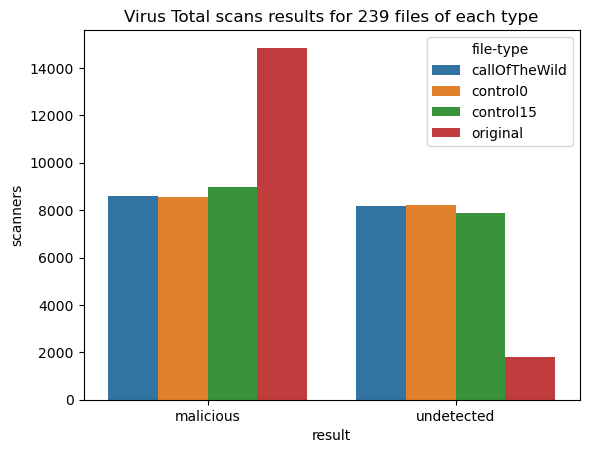

In [11]:
ax = sns.barplot(data=sns_df, x='result', y='scanners', hue='file-type')
ax.set_title("Virus Total scans results for 239 files of each type")

In [12]:
filtered_df

,file,size,harmless,type-unsupported,suspicious,malicious,undetected,file-type,exe,orig-exe,size-MB
/,,,,,,,,,,,
1,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,30,41,callOfTheWild,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
2,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,31,40,control0,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
3,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,3081326,0,4,0,44,26,control15,0009d99691e8eed99c7dd1500e07cda336d54260.exe.c...,0009d99691e8eed99c7dd1500e07cda336d54260.exe,3.081326
952,0009d99691e8eed99c7dd1500e07cda336d54260.exe.rpt,409600,0,4,0,62,8,original,0009d99691e8eed99c7dd1500e07cda336d54260.exe,0009d99691e8eed99c7dd1500e07cda336d54260.exe,0.409600
4,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,2966638,0,4,0,27,44,callOfTheWild,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe.c...,00113d9802cca3deba19cf9daa17f1c2269de2b8.exe,2.966638
...,...,...,...,...,...,...,...,...,...,...,...
1189,0561dbf2400ffc02cb072816320567fc3346929c.exe.rpt,348160,0,4,0,63,7,original,0561dbf2400ffc02cb072816320567fc3346929c.exe,0561dbf2400ffc02cb072816320567fc3346929c.exe,0.348160
715,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,2610286,0,4,0,38,33,callOfTheWild,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe,2.610286
716,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,2610286,0,4,0,44,26,control0,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe.c...,0566ff1fab76d5648241f82b642007a10cbd1bd6.exe,2.610286


Text(0.5, 1.0, 'Scatter of individual files')

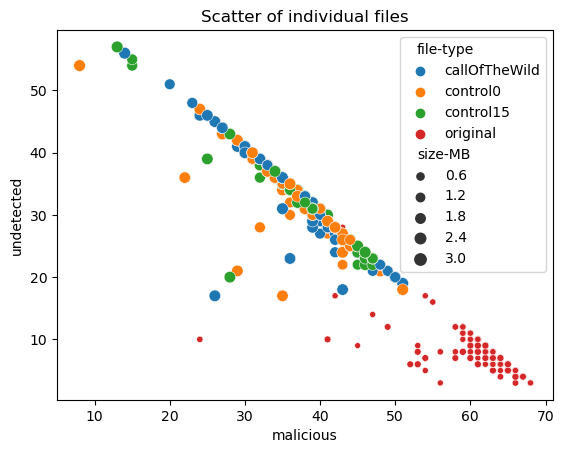

In [13]:
ax = sns.scatterplot(data=filtered_df, x='malicious', y='undetected', hue='file-type', size='size-MB')
ax.set_title("Scatter of individual files")

Text(0.5, 1.0, 'Scatter of individual files')

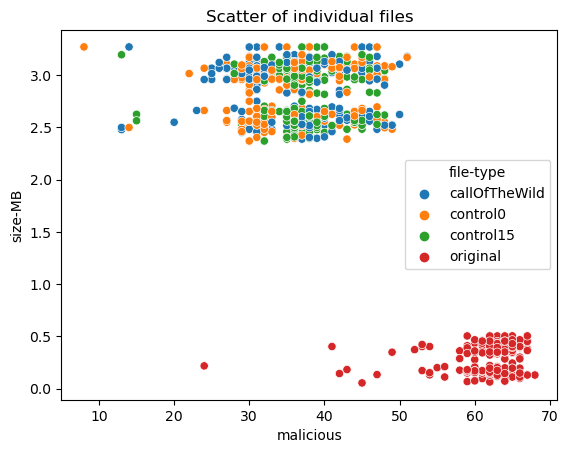

In [14]:
ax = sns.scatterplot(data=filtered_df, x='malicious', y='size-MB', hue='file-type')
ax.set_title("Scatter of individual files")

Text(0.5, 1.0, 'Scatter of individual files')

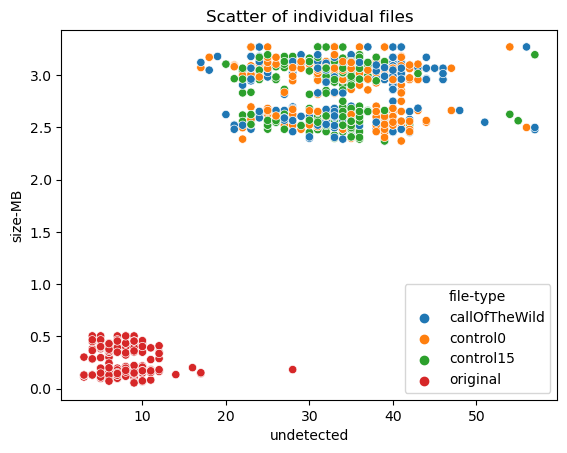

In [15]:
ax = sns.scatterplot(data=filtered_df, x='undetected', y='size-MB', hue='file-type')
ax.set_title("Scatter of individual files")

## Overall for all

In [16]:
filtered_df["malicious	undetected	size-MB".split("	")].describe()

,malicious,undetected,size-MB
count,956.000000,956.000000,956.000000
mean,42.859833,27.233264,2.222167
std,12.517933,12.743338,1.134310
min,8.000000,3.000000,0.053973
25%,34.000000,17.000000,1.903634
50%,38.000000,32.000000,2.652590
75%,49.000000,36.000000,3.064942
max,68.000000,57.000000,3.270766


## Overall for cloaked

In [17]:
filtered_df[filtered_df['file-type']!='original']["malicious	undetected	size-MB".split("	")].describe()

,malicious,undetected,size-MB
count,717.000000,717.000000,717.000000
mean,36.429568,33.807531,2.862781
std,5.993676,6.413307,0.258357
min,8.000000,17.000000,2.370072
25%,32.000000,31.000000,2.600046
50%,36.000000,34.000000,2.962542
75%,39.000000,39.000000,3.081326
max,51.000000,57.000000,3.270766


## Overall for original

In [18]:
filtered_df[filtered_df['file-type']=='original']["malicious	undetected	size-MB".split("	")].describe()

,malicious,undetected,size-MB
count,239.000000,239.000000,239.000000
mean,62.150628,7.510460,0.300327
std,4.736137,2.655044,0.129359
min,24.000000,3.000000,0.053973
25%,61.000000,6.000000,0.168960
50%,63.000000,7.000000,0.350208
75%,65.000000,9.000000,0.407552
max,68.000000,28.000000,0.504320


In [19]:
best_cloaked = filtered_df[filtered_df['malicious']==8]
best_cloaked

,file,size,harmless,type-unsupported,suspicious,malicious,undetected,file-type,exe,orig-exe,size-MB
/,,,,,,,,,,,
14,0032014825d220f2a26632baf9ade7bb537bf4ac.exe.c...,3270766,0,4,0,8,54,control0,0032014825d220f2a26632baf9ade7bb537bf4ac.exe.c...,0032014825d220f2a26632baf9ade7bb537bf4ac.exe,3.270766


In [20]:
worst_cloaked = filtered_df[filtered_df['malicious']==51]
worst_cloaked

,file,size,harmless,type-unsupported,suspicious,malicious,undetected,file-type,exe,orig-exe,size-MB
/,,,,,,,,,,,
370,02ec1cdc2cd1d6cf443e3dfc53564f34fcf9def6.exe.c...,3179630,0,4,0,51,19,callOfTheWild,02ec1cdc2cd1d6cf443e3dfc53564f34fcf9def6.exe.c...,02ec1cdc2cd1d6cf443e3dfc53564f34fcf9def6.exe,3.179630
686,054046eaf665468dad8b44230ba437847ec5963a.exe.c...,3171438,0,4,0,51,18,control0,054046eaf665468dad8b44230ba437847ec5963a.exe.c...,054046eaf665468dad8b44230ba437847ec5963a.exe,3.171438


### Padding Factor

In [21]:
filtered_df.loc[df['exe']=='02ec1cdc2cd1d6cf443e3dfc53564f34fcf9def6.exe', 'size-MB'].iloc[0]

0.458752

In [22]:
size = filtered_df['size-MB']

In [29]:
right = filtered_df[filtered_df['exe']==filtered_df['orig-exe']][['orig-exe', 'size-MB']]
left = filtered_df[['exe', 'orig-exe']]
left
merged = pd.merge(left, right, on='orig-exe')
size_orig = merged['size-MB']
#len(right), len(left)

In [30]:
filtered_df['padding-factor'] = size/size_orig

/tmp/ipykernel_786291/830345952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['padding-factor'] = size/size_orig


In [34]:
filtered_df[filtered_df['exe']!=filtered_df['orig-exe']]['padding-factor'].describe()

count    717.000000
mean      12.111347
std        7.244997
min        4.920950
25%        6.983270
50%        8.285618
75%       16.997788
max       47.367600
Name: padding-factor, dtype: float64